# import




In [2]:
import  collections
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from os import path
import pathlib
from pathlib import Path



In [3]:
from google.colab import drive
drive.mount('/content/drive') ## 이작업을 해줘야 드라이브에 있는 엑셀파일을 열 수 있음.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

# Data 처리

In [5]:
data=np.load("/content/drive/MyDrive/Colab Notebooks/2.5secdata.npy",allow_pickle=True)
label=np.load("/content/drive/MyDrive/Colab Notebooks/2.5seclabel.npy",allow_pickle=True)

In [6]:
data=np.array(data)
label=np.array(label)

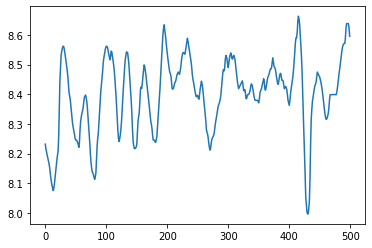

In [7]:
plt.plot(data[0,:,0])

In [8]:
print(data.shape)
shap=data.shape
print(label.shape)


(25485, 500, 9)
(25485,)


In [9]:
from sklearn.preprocessing import MinMaxScaler
data=data.reshape(data.shape[0]*data.shape[1],data.shape[2])
scaler = MinMaxScaler()
scaler.fit(data)
data=scaler.transform(data)

In [10]:
data=data.reshape(shap)
print(data.shape)

(25485, 500, 9)


In [11]:
import collections

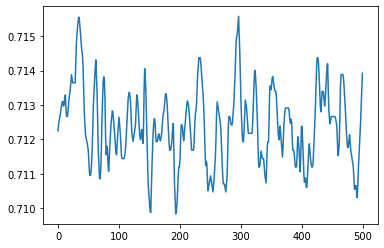

In [12]:
plt.plot(data[8,:,0])

In [15]:
data[8,:,0]

array([0.71224902, 0.71244633, 0.71255181, 0.71267289, 0.71277581,
       0.71289708, 0.71300277, 0.7131045 , 0.71309073, 0.71297056,
       0.7130211 , 0.71324234, 0.71329151, 0.7129182 , 0.71266466,
       0.71266466, 0.7127325 , 0.71297464, 0.71318404, 0.71330698,
       0.71345047, 0.71367407, 0.71388273, 0.71375624, 0.7136454 ,
       0.7136454 , 0.7136454 , 0.7136454 , 0.7136454 , 0.71413864,
       0.71474616, 0.71505645, 0.71528444, 0.71544207, 0.7155611 ,
       0.71547631, 0.71526525, 0.7150416 , 0.71478273, 0.71458036,
       0.71445735, 0.7141284 , 0.71341111, 0.712813  , 0.71243198,
       0.71214713, 0.71205419, 0.7119453 , 0.71186208, 0.71175447,
       0.71156118, 0.71119454, 0.7109484 , 0.7109484 , 0.71103871,
       0.71128862, 0.71171073, 0.71241136, 0.71301381, 0.71340286,
       0.71376234, 0.71409493, 0.71431512, 0.71385516, 0.71334301,
       0.71254772, 0.71166638, 0.71128148, 0.7108668 , 0.71085142,
       0.711101  , 0.71170548, 0.71252966, 0.71318389, 0.71369

In [17]:
d=data[8,:,0]

In [27]:

from numpy import argmax
x=np.array(np.arange(-1,1.001,0.001))


In [28]:
tot=[]
for i in range(len(d)):
  el=[]
  for j in range(len(x)-1):
    if d[i]>=x[j] and d[i]<=x[j+1]:
      el.append(1)
    else: 
      el.append(0)
  tot.append(el)

In [29]:
k=np.array(tot)

In [30]:
k.shape

(500, 2000)

In [ ]:
collections.Counter(label)

Counter({'BSC': 3,
         'CSI': 71,
         'CSO': 101,
         'FKL': 1,
         'JOG': 2014,
         'JUM': 1912,
         'LYI': 818,
         'SIT': 1543,
         'STD': 8035,
         'STN': 697,
         'STU': 805,
         'WAL': 9485})

In [ ]:
num_feat=3

In [ ]:
data=data[:,:,:num_feat]

In [ ]:
stdlabel=np.array(np.where(label=="STD")).flatten()
sitlabel=np.array(np.where(label=="SIT")).flatten()
wallabel=np.array(np.where(label=="WAL")).flatten()
jumlabel=np.array(np.where(label=="JUM")).flatten()
joglabel=np.array(np.where(label=="JOG")).flatten()
lyilabel=np.array(np.where(label=="LYI")).flatten()
stplabel=np.array(np.where(label=="STP")).flatten()
juglabel=np.array(np.where(label=="JUG")).flatten()
used_label=np.concatenate([lyilabel,sitlabel,stdlabel,wallabel,jumlabel,joglabel])

In [ ]:
data=data[used_label]
label=label[used_label]

In [ ]:
print(data.shape)

(23807, 500, 3)


In [ ]:
div=data.shape[0]//10
na=data.shape[0]-div*10
print(na)

7


In [ ]:
import random
if na !=0:
  data=data[:-na]
  label=label[:-na]
  idx = np.arange(data.shape[0])
  np.random.shuffle(idx)
  print(len(idx))


23800


In [ ]:
print(idx)
print(label[idx])

[10601  2977  8227 ...  4445 19301  3818]
['WAL' 'STD' 'STD' ... 'STD' 'WAL' 'STD']


In [ ]:

import random
labelnum=6
T_num=10
x=data[idx]
y=label[idx]

In [ ]:
print(y)

['WAL' 'STD' 'STD' ... 'STD' 'WAL' 'STD']


In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
print(x.shape)

(23800, 500, 3)


In [ ]:
from tensorflow import keras

In [ ]:
x=x.reshape(div*2,5,data.shape[1],data.shape[2])
print(x.shape)

(4760, 5, 500, 3)


In [ ]:
ori,cat=np.unique(y,return_inverse=True)


In [ ]:
print(ori)

['JOG' 'JUM' 'LYI' 'SIT' 'STD' 'WAL']


In [ ]:
print(cat)

[5 4 4 ... 4 5 4]


In [ ]:
import tensorflow as tf

In [ ]:
pip install MultiPlanarUNet

In [ ]:
label_data=(cat.reshape(div,10))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, BatchNormalization, Cropping2D, \
                                    Concatenate, MaxPooling2D, Dense, \
                                    UpSampling2D, ZeroPadding2D, Lambda, Conv2D, \
                                    AveragePooling2D, DepthwiseConv2D
from MultiPlanarUNet.logging import ScreenLogger
from MultiPlanarUNet.utils.conv_arithmetics import compute_receptive_fields


# Model Implementation

In [ ]:
import numpy as np


def get_steps(samples_per_epoch, sequence):
    """
    Computes the number of gradient update steps to use for training or
    validation.

    Takes an integer 'samples_per_epoch' specifying how many samples should be
    used in 1 epoch. Returns the (ceiled) number of batches of size
    'batch_size' needed for such epoch.

    If 'samples_per_epoch' is None, returns the length of the
    Sequence object.

    Args:
        samples_per_epoch: (int)      Number of samples to use in an epoch
        sequence:          (Sequence) The Sequence object from which samples
                                      will be generated

    Returns:
        (int) Number of steps to take in the epoch
    """
    if samples_per_epoch:
        return int(np.ceil(samples_per_epoch / sequence.batch_size))
    else:
        return len(sequence)


In [ ]:
"""
Implementation of UTime as described in:

Mathias Perslev, Michael Hejselbak Jensen, Sune Darkner, Poul Jørgen Jennum
and Christian Igel. U-Time: A Fully Convolutional Network for Time Series
Segmentation Applied to Sleep Staging. Advances in Neural Information
Processing Systems (NeurIPS 2019)
"""
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, BatchNormalization, Cropping2D, \
                                    Concatenate, MaxPooling2D, Dense, \
                                    UpSampling2D, ZeroPadding2D, Lambda, Conv2D, \
                                    AveragePooling2D, DepthwiseConv2D
from MultiPlanarUNet.logging import ScreenLogger
from MultiPlanarUNet.utils.conv_arithmetics import compute_receptive_fields


class UTime(Model):
    """
    OBS: Uses 2D operations internally with a 'dummy' axis, so that a batch
         of shape [bs, d, c] is processed as [bs, d, 1, c]. These operations
         are (on our systems, at least) currently significantly faster than
         their 1D counterparts in tf.keras.

    See also original U-net paper at http://arxiv.org/abs/1505.04597
    """
    def __init__(self,
                 n_classes,
                 batch_shape,
                 depth=4,
                 dilation=2,
                 activation="elu",
                 dense_classifier_activation="tanh",
                 kernel_size=5,
                 transition_window=1,
                 padding="same",
                 complexity_factor=2,
                 l2_reg=None,
                 pools=(10, 8, 6, 4),
                 data_per_prediction=None,
                 logger=None,
                 build=True,
                 **kwargs):
        """
        n_classes (int):
            The number of classes to model, gives the number of filters in the
            final 1x1 conv layer.
        batch_shape (list): Giving the shape of one one batch of data,
                            potentially omitting the zeroth axis (the batch
                            size dim)
        depth (int):
            Number of conv blocks in encoding layer (number of 2x2 max pools)
            Note: each block doubles the filter count while halving the spatial
            dimensions of the features.
        dilation (int):
            TODO
        activation (string):
            Activation function for convolution layers
        dense_classifier_activation (string):
            TODO
        kernel_size (int):
            Kernel size for convolution layers
        transition_window (int):
            TODO
        padding (string):
            Padding type ('same' or 'valid')
        complexity_factor (int/float):
            Use int(N * sqrt(complexity_factor)) number of filters in each
            convolution layer instead of default N.
        l2_reg (float in [0, 1])
            L2 regularization on conv weights
        pools (int or list of ints):
            TODO
        data_per_prediction (int):
            TODO
        logger (MultiPlanarUNet.logging.Logger | ScreenLogger):
            MutliViewUNet.Logger object, logging to files or screen.
        build (bool):
            TODO
        """
        super(UTime, self).__init__()

        # Set logger or standard print wrapper
        self.logger = logger or ScreenLogger()

        # Set various attributes
        assert len(batch_shape) == 4
        self.n_periods = batch_shape[1]
        self.input_dims = batch_shape[2]
        self.n_channels = batch_shape[3]
        self.n_classes = int(n_classes)
        self.dilation = int(dilation)
        self.cf = complexity_factor
        self.init_filters = int(8 * self.cf)
        self.kernel_size = int(kernel_size)
        self.transition_window = transition_window
        self.activation = activation
        self.l2_reg = l2_reg
        self.depth = depth
        self.n_crops = 0
        self.pools = [pools] * self.depth if not \
            isinstance(pools, (list, tuple)) else pools
        if len(self.pools) != self.depth:
            raise ValueError("Argument 'pools' must be a single integer or a "
                             "list of values of length equal to 'depth'.")
        self.padding = padding.lower()
        if self.padding != "same":
            raise ValueError("Currently, must use 'same' padding.")

        self.dense_classifier_activation = dense_classifier_activation
        self.data_per_prediction = data_per_prediction or self.input_dims
        if not isinstance(self.data_per_prediction, (int, np.integer)):
            raise TypeError("data_per_prediction must be an integer value")
        if self.input_dims % self.data_per_prediction:
            raise ValueError("'input_dims' ({}) must be evenly divisible by "
                             "'data_per_prediction' ({})".format(self.input_dims,
                                                                 self.data_per_prediction))

        if build:
            # Build model and init base keras Model class
            super().__init__(*self.init_model())

            # Compute receptive field
            ind = [x.__class__.__name__ for x in self.layers].index("UpSampling2D")
            self.receptive_field = compute_receptive_fields(self.layers[:ind])[-1][-1]

            # Log the model definition
            self.log()
        else:
            self.receptive_field = [None]

    @staticmethod
    def create_encoder(in_,
                       depth,
                       pools,
                       filters,
                       kernel_size,
                       activation,
                       dilation,
                       padding,
                       kernel_reg=None,
                       name="encoder",
                       name_prefix=""):
        name = "{}{}".format(name_prefix, name)
        residual_connections = []
        for i in range(depth):
            l_name = name + "_L%i" % i
            
            conv = Conv2D(filters, (kernel_size, 1),
                          activation=activation, padding=padding,
                          kernel_regularizer=kernel_reg,
                          dilation_rate=dilation,
                          name=l_name + "_conv1")(in_)
            bn = BatchNormalization(name=l_name + "_BN1")(conv)
            conv = Conv2D(filters, (kernel_size, 1),
                          activation=activation, padding=padding,
                          kernel_regularizer=kernel_reg,
                          dilation_rate=dilation,
                          name=l_name + "_conv2")(bn)
            bn = BatchNormalization(name=l_name + "_BN2")(conv)
            in_ = MaxPooling2D(pool_size=(pools[i], 1),
                               name=l_name + "_pool")(bn)

            # add bn layer to list for residual conn.
            residual_connections.append(bn)
            filters = int(filters * 2)

        # Bottom
        name = "{}bottom".format(name_prefix)
        conv = Conv2D(filters, (kernel_size, 1),
                      activation=activation, padding=padding,
                      kernel_regularizer=kernel_reg,
                      dilation_rate=1,
                      name=name + "_conv1")(in_)
        bn = BatchNormalization(name=name + "_BN1")(conv)
        conv = Conv2D(filters, (kernel_size, 1),
                      activation=activation, padding=padding,
                      kernel_regularizer=kernel_reg,
                      dilation_rate=1,
                      name=name + "_conv2")(bn)
        encoded = BatchNormalization(name=name + "_BN2")(conv)

        return encoded, residual_connections, filters

    def create_upsample(self,
                        in_,
                        res_conns,
                        depth,
                        pools,
                        filters,
                        kernel_size,
                        activation,
                        dilation,  # NOT USED
                        padding,
                        kernel_reg=None,
                        name="upsample",
                        name_prefix=""):
        name = "{}{}".format(name_prefix, name)
        residual_connections = res_conns[::-1]
        for i in range(depth):
            filters = int(filters/2)
            l_name = name + "_L%i" % i

            # Up-sampling block
            fs = pools[::-1][i]
            up = UpSampling2D(size=(fs, 1),
                              name=l_name + "_up")(in_)
            conv = Conv2D(filters, (fs, 1),
                          activation=activation,
                          padding=padding, kernel_regularizer=kernel_reg,
                          name=l_name + "_conv1")(up)
            bn = BatchNormalization(name=l_name + "_BN1")(conv)

            # Crop and concatenate
            cropped_res = self.crop_nodes_to_match(residual_connections[i], bn)
            # cropped_res = residual_connections[i]
            merge = Concatenate(axis=-1,
                                name=l_name + "_concat")([cropped_res, bn])
            conv = Conv2D(filters, (kernel_size, 1),
                          activation=activation, padding=padding,
                          kernel_regularizer=kernel_reg,
                          name=l_name + "_conv2")(merge)
            bn = BatchNormalization(name=l_name + "_BN2")(conv)
            conv = Conv2D(filters, (kernel_size, 1),
                          activation=activation, padding=padding,
                          kernel_regularizer=kernel_reg,
                          name=l_name + "_conv3")(bn)
            in_ = BatchNormalization(name=l_name + "_BN3")(conv)
        return in_

    def create_dense_modeling(self,
                              in_,
                              in_reshaped,
                              filters,
                              dense_classifier_activation,
                              name_prefix=""):
        cls = Conv2D(filters=filters,
                     kernel_size=(1, 1),
                     activation=dense_classifier_activation,
                     name="{}dense_classifier_out".format(name_prefix))(in_)
        s = (self.n_periods * self.input_dims) - cls.get_shape().as_list()[1]
        out = self.crop_nodes_to_match(
            node1=ZeroPadding2D(padding=[[s // 2, s // 2 + s % 2], [0, 0]])(cls),
            node2=in_reshaped
        )
        return out

    @staticmethod
    def create_seq_modeling(in_,
                            input_dims,
                            data_per_period,
                            n_periods,
                            n_classes,
                            transition_window,
                            name_prefix=""):
        cls = AveragePooling2D((data_per_period, 1),
                               name="{}average_pool".format(name_prefix))(in_)
        out = Conv2D(filters=n_classes,
                     kernel_size=(transition_window, 1),
                     activation="softmax",
                     kernel_regularizer=regularizers.l2(1e-5),
                     padding="same",
                     name="{}sequence_conv_out".format(name_prefix))(cls)
        s = [-1, n_periods, input_dims//data_per_period, n_classes]
        if s[2] == 1:
            s.pop(2)  # Squeeze the dim
        out = Lambda(lambda x: tf.reshape(x, s),
                     name="{}sequence_classification_reshaped".format(name_prefix))(out)
        return out

    def init_model(self, inputs=None, create_seg_modeling=True, name_prefix=""):
        """
        Build the UNet model with the specified input image shape.
        """
        if inputs is None:
            inputs = Input(shape=[self.n_periods,
                                  self.input_dims,
                                  self.n_channels])
        reshaped = [-1, self.n_periods*self.input_dims, 1, self.n_channels]
        in_reshaped = Lambda(lambda x: tf.reshape(x, reshaped))(inputs)

        # Apply regularization if not None or 0
        kr = regularizers.l2(self.l2_reg) if self.l2_reg else None

        settings = {
            "depth": self.depth,
            "pools": self.pools,
            "filters": self.init_filters,
            "kernel_size": self.kernel_size,
            "activation": self.activation,
            "dilation": self.dilation,
            "padding": self.padding,
            "kernel_reg": kr,
            "name_prefix": name_prefix
        }

        """
        Encoding path
        """
        enc, residual_cons, filters = self.create_encoder(in_=in_reshaped,
                                                          **settings)

        """
        Decoding path
        """
        settings["filters"] = filters
        up = self.create_upsample(enc, residual_cons, **settings)

        """
        Dense class modeling layers
        """
        cls = self.create_dense_modeling(in_=up,
                                         in_reshaped=in_reshaped,
                                         filters=self.n_classes,
                                         dense_classifier_activation=self.dense_classifier_activation,
                                         name_prefix=name_prefix)

        """
        Sequence modeling
        """
        if create_seg_modeling:
            out = self.create_seq_modeling(in_=cls,
                                           input_dims=self.input_dims,
                                           data_per_period=self.data_per_prediction,
                                           n_periods=self.n_periods,
                                           n_classes=self.n_classes,
                                           transition_window=self.transition_window,
                                           name_prefix=name_prefix)
        else:
            out = cls

        return [inputs], [out]

    def crop_nodes_to_match(self, node1, node2):
        """
        If necessary, applies Cropping2D layer to node1 to match shape of node2
        """
        s1 = np.array(node1.get_shape().as_list())[1:-2]
        s2 = np.array(node2.get_shape().as_list())[1:-2]

        if np.any(s1 != s2):
            self.n_crops += 1
            c = (s1 - s2).astype(np.int)
            cr = np.array([c // 2, c // 2]).flatten()
            cr[self.n_crops % 2] += c % 2
            cropped_node1 = Cropping2D([list(cr), [0, 0]])(node1)
        else:
            cropped_node1 = node1
        return cropped_node1

    def log(self):
        self.logger("{} Model Summary\n"
                    "-------------------".format(__class__.__name__))
        self.logger("N periods:         {}".format(self.n_periods))
        self.logger("Input dims:        {}".format(self.input_dims))
        self.logger("N channels:        {}".format(self.n_channels))
        self.logger("N classes:         {}".format(self.n_classes))
        self.logger("Kernel size:       {}".format(self.kernel_size))
        self.logger("Dilation rate:     {}".format(self.dilation))
        self.logger("CF factor:         %.3f" % self.cf)
        self.logger("Init filters:      {}".format(self.init_filters))
        self.logger("Depth:             %i" % self.depth)
        self.logger("Poolings:          {}".format(self.pools))
        self.logger("Transition window  {}".format(self.transition_window))
        self.logger("Dense activation   {}".format(self.dense_classifier_activation))
        self.logger("l2 reg:            %s" % self.l2_reg)
        self.logger("Padding:           %s" % self.padding)
        self.logger("Conv activation:   %s" % self.activation)
        self.logger("Receptive field:   %s" % self.receptive_field[0])
        self.logger("Seq length.:       {}".format(self.n_periods*self.input_dims))
        self.logger("N params:          %i" % self.count_params())
        self.logger("Input:             %s" % self.input)
        self.logger("Output:            %s" % self.output)


In [ ]:
"""
The Trainer class prepares and launches training of a model.
Most importantly, it compiles the tf.keras Model object with according to the
specified optimizer, loss and metrics and implements the .fit method for
training the model given a set of parameters and (non-initialized) callbacks.
"""

from multiprocessing import cpu_count
from tensorflow.keras import optimizers, losses
from tensorflow.python.framework.errors_impl import (ResourceExhaustedError,
                                                     InternalError)
from MultiPlanarUNet.callbacks import (init_callback_objects,
                                       remove_validation_callbacks)
from MultiPlanarUNet.logging import ScreenLogger
from MultiPlanarUNet.callbacks import (DividerLine, LearningCurve)
from MultiPlanarUNet.utils import ensure_list_or_tuple
from MultiPlanarUNet.train.utils import (ensure_sparse, init_losses,
                                         init_metrics)


class Trainer(object):
    """
    Handles initialization and logging of model fitting sessions.
    """
    def __init__(self, model, org_model=None, logger=None):
        """
        Init. simply accepts a model and stores it.
        Optionally, an 'org_model' (original model) may be passed and stored
        as well. This is for training multi-GPU models prepared by the
        tf.keras.utils.multi_gpu_model utility, which returns a new, split
        model for training (passed as 'model' parameter here). For properly
        saving the model parameter, however, it is recommended to use the
        original, non-split model (here passed as 'org_model').

        Args:
            model:      (tf.keras Model) Initialized model to train
            org_model:  (tf.keras Model) Optional single-GPU version for the
                                         passed 'model' parameter.
            logger:     (Logger)         Optional Logger instance
        """
        self.model = model
        self.logger = logger if logger is not None else ScreenLogger()

        # Extra reference to original (non multiple-GPU) model
        # May also be set from a script at a later time (before self.fit call)
        self.org_model = org_model

    def compile_model(self, optimizer, optimizer_kwargs, loss, metrics, **kwargs):
        """
        Compile the stored tf.keras Model instance stored in self.model
        Sets the loss function, optimizer and metrics

        Args:
            optimizer:        (string) The name of a tf.keras.optimizers Optimizer
            optimizer_kwargs: (dict)   Key-word arguments passed to the Optimizer
            loss:             (string) The name of a tf.keras.losses or
                                       MultiPlanarUnet loss function
            metrics:          (list)   List of tf.keras.metrics or
                                       MultiPlanarUNet metrics.
            **kwargs:         (dict)   Key-word arguments passed to losses
                                       and/or metrics that accept such.
        """
        # Make sure sparse metrics and loss are specified as sparse
        metrics = ensure_list_or_tuple(metrics)
        losses = ensure_list_or_tuple(loss)
        ensure_sparse(metrics+losses)

        # Initialize optimizer
        optimizer = optimizers.__dict__[optimizer]
        optimizer = optimizer(**optimizer_kwargs)

        # Initialize loss(es) and metrics from tf.keras or MultiPlanarUNet
        losses = init_losses(losses, self.logger, **kwargs)
        metrics = init_metrics(metrics, self.logger, **kwargs)

        # Compile the model
        self.model.compile(optimizer=optimizer, loss=losses, metrics=metrics)
        self.logger("Optimizer:   %s" % optimizer)
        self.logger("Loss funcs:  %s" % losses)
        self.logger("Metrics:     %s" % init_metrics)
        return self

    def fit(self, batch_size, **fit_kwargs):
        """
        Fit the stored tf.keras Model (self.model) on a set of data.

        The 'fit' method is a wrapper around the hidden '_fit' method. It
        handles KeyboardInterrupts (--> stopping training prematurely), TF
        GPU memory errors (--> batch_size is reduced by 2 and training
        restarted), and other exceptions (--> error logged and training
        terminated).

        Please refer to the self._fit method for 'fit_kwargs' argument details.

        Args:
            batch_size: (int)  The initial batch size to run training with
            fit_kwargs: (dict) Keyword arguments passed to self._fit
        """
        fitting = True
        while fitting:
            try:
                self._fit(batch_size=batch_size, **fit_kwargs)
                fitting = False
            except (ResourceExhaustedError, InternalError):
                # Reduce batch size
                batch_size -= 2
                self.logger("\n\n[MEMORY ERROR] Reducing batch size "
                            "by 2 (now %i)" % batch_size)
                if batch_size < 1:
                    self.logger("[ERROR] Batch size negative or zero!")
                    fitting = False
            except KeyboardInterrupt:
                fitting = False
            except Exception as e:
                self.logger(e)
                raise e
        self.logger.print_calling_method = True
        self.logger("Training stopped.")
        return self.model

    def _fit(self,
             train,
             val,
             batch_size,
             n_epochs,
             callbacks,
             train_samples_per_epoch,
             val_samples_per_epoch,
             verbose=1,
             init_epoch=0,
             use_multiprocessing=False,
             **unused):
        """
        Args:
            train: (Sequence)       The training Sequence object
            val    (Sequence, None) The validation Sequence object or None if no
                                    validation is to be performed
            batch_size: (int)       The batch size to use for training
            n_epochs: (int)         Number of epochs to train for
            callbacks: (list)       List of uninitialized callback kwargs.
            train_samples_per_epoch: (int) Number of training samples to sample
                                           before an epoch is determined over.
            val_samples_per_epoch:   (int) Same as 'train_samples_per_epoch'
            verbose: (int/bool)     Verbosity level passed to keras.fit_generator
            init_epoch: (int)       The initial epoch
            use_multiprocessing: (bool) Whether to use multiprocessing instead
                                        of multithreading.
        """
        train.batch_size = batch_size
        train_steps = get_steps(train_samples_per_epoch, train)
        self.logger("Using %i steps per train epoch (total batches=%i)" %
                    (train_steps, len(train)))
        '''
        val=None
        if val is None or len(val) == 0:
            # No validation to be performed, remove callbacks that might need
            # validation data to function properly
            remove_validation_callbacks(callbacks, self.logger)
        else:
            val.batch_size = batch_size
            val_steps = get_steps(val_samples_per_epoch, val)
            self.logger("Using %i steps per validation epoch "
                        "(total batches=%i)" % (val_steps, len(val)))
            # Add validation callback
            # Important: Should be first in callbacks list as other CBs may
            # depend on the validation metrics/loss
            validation = Validation(val,
                                    steps=val_steps,
                                    logger=self.logger,
                                    verbose=verbose)
            callbacks = [validation] + callbacks

        # Callback for plotting learning curves
        callbacks.append(LearningCurve(logger=self.logger))
        callbacks = callbacks + [DividerLine(self.logger)]

        # Get initialized callback objects
        callbacks, cb_dict = init_callback_objects(callbacks, self.logger)

        # If ModelCheckPointClean is used, set the original model to store
        # the correct weights when using multi-GPU models
        cb = cb_dict.get("ModelCheckPointClean")
        if cb:
            cb.org_model = self.org_model
        '''
        # Fit the model
        self.logger.active_log_file = "training"
        self.logger.print_calling_method = False
        self.model.fit_generator(
            generator=train,
            steps_per_epoch=train_steps,
            epochs=n_epochs,
            initial_epoch=init_epoch,
            use_multiprocessing=use_multiprocessing,  # Normally False
            workers=min(7, cpu_count()-1),
            max_queue_size=25,
            shuffle=False,  # Determined by the chosen Sequence class
            verbose=verbose
        )


In [ ]:

from tensorflow.keras.utils import Sequence
import math
class MobiactDataSequence(Sequence):
    def __init__(self, x,y,batch_size):
        self.x=x, self.y=y
        self.batch_size=batch_size
    def __len__(self):
        return math.ceil(len(self.x)/self.batch_size)
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) *
        self.batch_size]

        return np.array(batch_x),np.array(batch_y)


In [ ]:
import utime

from MultiPlanarUNet.hyperparameters import YAMLHParams as _YAMLHParams


class YAMLHParams(_YAMLHParams):
    """
    Wraps the YAMLHParams class from MultiPlanarUNet, passing 'utime' as the
    package for correct version controlling.
    """
    def __init__(self, *args, **kwargs):
        kwargs["package"] = utime.__name__
        super(YAMLHParams, self).__init__(
            *args, **kwargs
        )


In [ ]:
y=cat

In [ ]:
import os
project_dir = os.path.abspath("./drive/MyDrive/Colab Notebooks/")
hparams = YAMLHParams(os.path.join(project_dir, "hparams.yaml"))

YAML path:    /content/drive/MyDrive/Colab Notebooks/hparams.yaml
[WARNING] Path /content/drive/MyDrive does not contain a Git repository, or Git is not installed on this system.
-- The software verison match could not be varified against the hyperparameter file.
-- Software version will not be added to the hyperparameter file.


In [ ]:
print(x.shape)
## 2.5초, 5초는 두번째 shape이 5가 되게
x=x.reshape(div*2,5,data.shape[1],data.shape[2])

(4760, 5, 500, 3)


In [ ]:
import torch
mod=UTime(6,batch_shape=x.shape)
t=Trainer(mod)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:342: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


UTime Model Summary
-------------------
N periods:         5
Input dims:        500
N channels:        3
N classes:         6
Kernel size:       5
Dilation rate:     2
CF factor:         2.000
Init filters:      16
Depth:             4
Poolings:          (10, 8, 6, 4)
Transition window  1
Dense activation   tanh
l2 reg:            None
Padding:           same
Conv activation:   elu
Receptive field:   33307
Seq length.:       2500
N params:          1191152
Input:             KerasTensor(type_spec=TensorSpec(shape=(None, 5, 500, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Output:            KerasTensor(type_spec=TensorSpec(shape=(None, 5, 6), dtype=tf.float32, name=None), name='sequence_classification_reshaped/Reshape:0', description="created by layer 'sequence_classification_reshaped'")


In [ ]:
y=y.reshape(div*2,5)
##2.5초일때는 3700, 5초일 2000?
x_train=x[:3700,:,:,:]
y_train=y[:3700]

x_val=x[3700:,:,:,:]
y_val=y[3700:]

In [ ]:
print(cat)

[5 4 4 ... 4 5 4]


In [ ]:
x_val=np.asarray(x_val).astype('float32')
val=MobiactDataSequence(x_val,y_val,8)

In [ ]:
x_train=np.asarray(x_train).astype('float32')
y_train=y_train.astype(int)

train=MobiactDataSequence(x_train,y_train,16)

t.compile_model(n_classes=hparams["build"].get("n_classes"),
                          **hparams["fit"])
t._fit(train,val,batch_size=16,n_epochs=200,callbacks=None,train_samples_per_epoch=3700,val_samples_per_epoch=13)

Optimizer:   <keras.optimizer_v2.adam.Adam object at 0x7fb0ff813a50>
Loss funcs:  [<function sparse_dice_loss at 0x7fb1734a6560>]
Metrics:     <function init_metrics at 0x7fb1734acc20>
Using 232 steps per train epoch (total batches=232)
Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:198: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


232/232 [==============================] - 19s 23ms/step - loss: 0.7969 - sparse_categorical_accuracy: 0.3935
Epoch 2/200
232/232 [==============================] - 3s 15ms/step - loss: 0.7706 - sparse_categorical_accuracy: 0.5229
Epoch 3/200
232/232 [==============================] - 3s 15ms/step - loss: 0.7513 - sparse_categorical_accuracy: 0.6126
Epoch 4/200
232/232 [==============================] - 3s 15ms/step - loss: 0.7352 - sparse_categorical_accuracy: 0.6755
Epoch 5/200
232/232 [==============================] - 3s 14ms/step - loss: 0.7213 - sparse_categorical_accuracy: 0.7132
Epoch 6/200
232/232 [==============================] - 3s 15ms/step - loss: 0.7084 - sparse_categorical_accuracy: 0.7364
Epoch 7/200
232/232 [==============================] - 3s 15ms/step - loss: 0.6960 - sparse_categorical_accuracy: 0.7531
Epoch 8/200
232/232 [==============================] - 3s 15ms/step - loss: 0.6842 - sparse_categorical_accuracy: 0.7674
Epoch 9/200
232/232 [======================

KeyboardInterrupt: ignored

In [ ]:
res=mod(x_val)
#print(res)

In [ ]:
print(np.array(res).shape)
res=np.array(res)
tot=[]
for j in range(x_val.shape[0]):
    for k in range(5): ##1초일때는 10,2.5초일때는 5
        prob=[]
        for i in range(6): ## 라벨 개수
            prob.append(((res[j,k,i])))
        #print(prob)
        midx=np.argmax(np.array(prob))
        tot.append(midx)
print(tot)

(1060, 5, 6)
[1, 3, 5, 3, 5, 5, 5, 5, 4, 5, 4, 5, 0, 4, 5, 5, 0, 4, 4, 5, 1, 0, 5, 5, 4, 5, 3, 4, 5, 1, 5, 4, 4, 4, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 4, 5, 3, 0, 4, 4, 5, 4, 5, 5, 1, 4, 0, 5, 4, 4, 5, 3, 5, 4, 4, 5, 0, 4, 3, 5, 5, 5, 5, 5, 5, 4, 0, 0, 5, 1, 0, 5, 5, 5, 4, 1, 5, 3, 0, 4, 5, 4, 5, 5, 4, 4, 5, 4, 1, 4, 1, 4, 4, 5, 1, 0, 4, 5, 0, 4, 0, 5, 3, 4, 4, 5, 1, 5, 5, 5, 4, 3, 4, 4, 4, 4, 1, 5, 4, 5, 5, 5, 5, 0, 4, 5, 5, 0, 5, 5, 5, 5, 0, 3, 5, 5, 4, 4, 5, 5, 5, 4, 0, 1, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 5, 0, 5, 5, 5, 0, 5, 4, 5, 5, 5, 5, 4, 5, 1, 4, 4, 0, 5, 4, 4, 5, 5, 5, 4, 5, 1, 5, 4, 5, 5, 5, 3, 5, 5, 5, 5, 4, 5, 0, 5, 1, 3, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 4, 2, 4, 0, 3, 5, 4, 4, 5, 5, 4, 1, 3, 1, 5, 4, 5, 5, 4, 5, 4, 5, 5, 3, 5, 4, 5, 5, 4, 3, 5, 4, 5, 4, 3, 5, 4, 5, 0, 5, 4, 4, 4, 5, 0, 4, 5, 5, 4, 1, 5, 3, 5, 5, 4, 5, 5, 5, 4, 3, 0, 5, 5, 1, 4, 4, 4, 5, 5, 4, 0, 4, 3, 3, 3, 3, 0, 0, 4, 1, 5, 1, 4, 4, 0, 5, 5, 1, 5, 5, 3, 4, 5, 5, 5, 3, 5, 4, 4, 4, 3, 5, 5, 5,

In [ ]:
y_pred=(np.array(tot).flatten())
y_val=y_val.flatten()

y_train=y_train.flatten()

In [ ]:
np.savetxt("y_pred_2.5_3feat.txt",y_pred)
np.savetxt("y_val_2.5_3feat.txt",y_val)